In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict
import seaborn as sns
%matplotlib inline

In [8]:
train_data = pd.read_csv("/content/synthetic_creditcard_updated.csv")
test_data = pd.read_csv("/content/synthetic_creditcard_updated.csv")


In [9]:
print(train_data)


        Feature1    Feature2    Feature3    Feature4    Feature5        Date  \
0     597.613191  809.427488  800.152648  932.129100  770.228766  31-01-2022   
1     747.700514  234.102665   59.925155  517.599465  124.434208  30-12-2022   
2     962.195876  289.924763  852.944203  387.624625  323.194250  10-05-2021   
3     935.158572  363.322572  390.287909  106.091780  670.446665  18-07-2022   
4     288.839414  585.604168  591.351704  719.199696  745.241486  04-02-2022   
...          ...         ...         ...         ...         ...         ...   
4995  504.684234  593.449152  927.683598  393.782522  101.843716  28-11-2021   
4996  325.826242  415.200215  272.963870  528.972405  304.857875  15-08-2020   
4997  103.179585  188.068514  918.156083  629.595629  314.308713  06-07-2019   
4998  366.917912  493.383171  673.130034  582.179890  932.698125  08-06-2023   
4999  625.748827  910.791980    5.430159  890.559472  721.458588  12-06-2023   

     Bank_Name  Class  Age Age_Group   

In [7]:
print(test_data)

        Feature1    Feature2    Feature3    Feature4    Feature5        Date  \
0     597.613191  809.427488  800.152648  932.129100  770.228766  2022-01-31   
1     747.700514  234.102665   59.925155  517.599465  124.434208  2022-12-30   
2     962.195876  289.924763  852.944203  387.624625  323.194250  2021-05-10   
3     935.158572  363.322572  390.287909  106.091780  670.446665  2022-07-18   
4     288.839414  585.604168  591.351704  719.199696  745.241486  2022-02-04   
...          ...         ...         ...         ...         ...         ...   
4995  504.684233  593.449152  927.683598  393.782522  101.843715  2021-11-28   
4996  325.826242  415.200215  272.963870  528.972405  304.857875  2020-08-15   
4997  103.179585  188.068514  918.156083  629.595629  314.308713  2019-07-06   
4998  366.917913  493.383171  673.130034  582.179890  932.698125  2023-06-08   
4999  625.748827  910.791980    5.430159  890.559472  721.458588  2023-06-12   

     Bank_Name  Class  Age Age_Group  


In [13]:
clean_data = train_data.dropna()
print(clean_data)

       Feature1    Feature2    Feature3    Feature4    Feature5        Date  \
0    597.613191  809.427488  800.152648  932.129100  770.228766  31-01-2022   
1    747.700514  234.102665   59.925155  517.599465  124.434208  30-12-2022   
2    962.195876  289.924763  852.944203  387.624625  323.194250  10-05-2021   
3    935.158572  363.322572  390.287909  106.091780  670.446665  18-07-2022   
4    288.839414  585.604168  591.351704  719.199696  745.241486  04-02-2022   
..          ...         ...         ...         ...         ...         ...   
295  520.874037  836.384236  830.192563  956.132856  698.272593  24-05-2019   
296  207.770629   20.280315  479.415799  513.703866  240.262585  31-08-2020   
297  124.697447  586.208166  764.255674  993.154104  758.302617  09-05-2022   
298  793.632414  616.460878  985.922659  639.956385  860.253286  21-02-2022   
299  945.784646  929.858500  381.415344   78.662058  171.873703  06-07-2019   

    Bank_Name  Class  Age Age_Group    Transaction_

<ipython-input-20-7a23b1a47251>:18: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


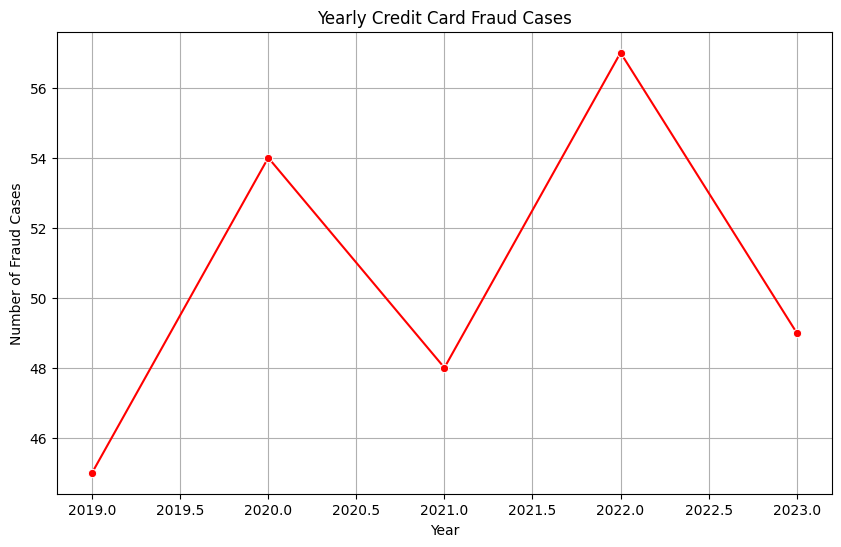

<ipython-input-20-7a23b1a47251>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bank_fraud, x='Fraud Cases', y='Bank_Name', palette="Reds_r")


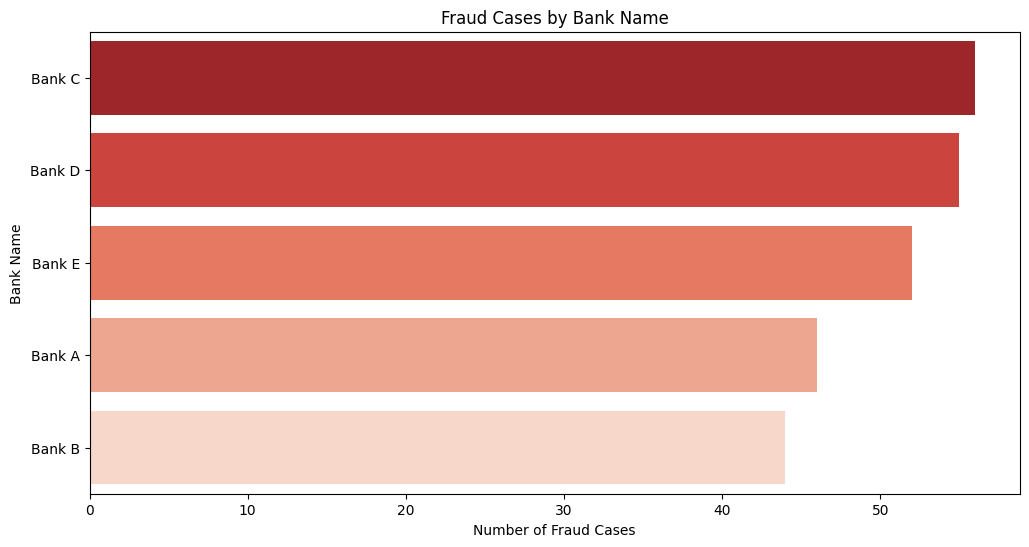

<ipython-input-20-7a23b1a47251>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_fraud, x='Age_Group', y='Fraud Cases', palette="Blues_r")


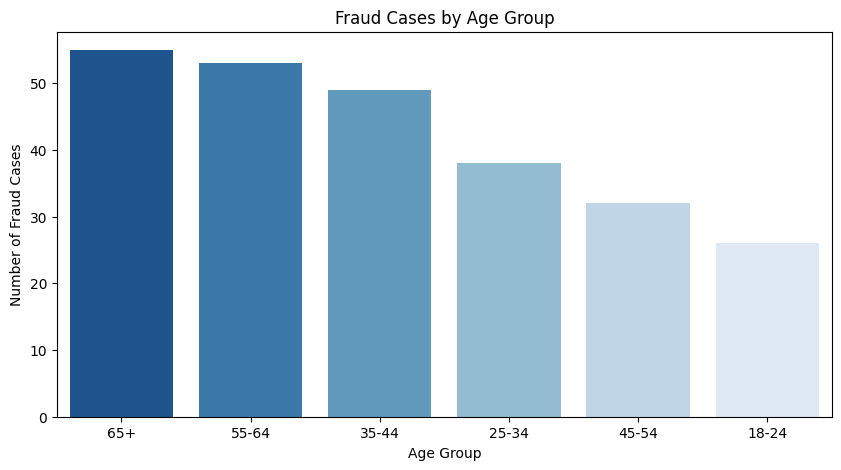


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.52      0.60       949
           1       0.37      0.57      0.45       475

    accuracy                           0.54      1424
   macro avg       0.54      0.55      0.53      1424
weighted avg       0.60      0.54      0.55      1424



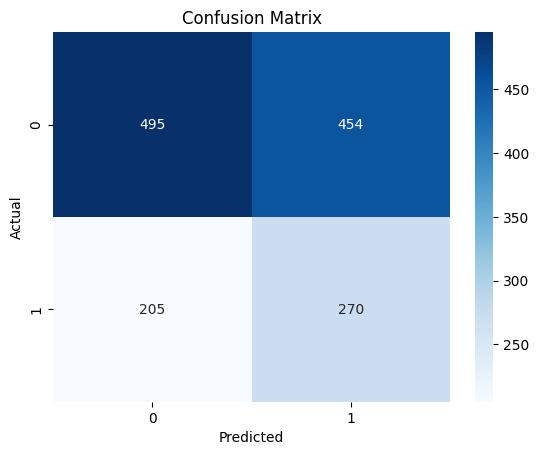

Model saved to logistic_regression_model.pkl

Sample Prediction: [0]


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load dataset
df = pd.read_csv('/content/synthetic_creditcard_updated.csv')  # Load your dataset here

# Convert Date column to datetime if available
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year  # Extract year from Date

# Yearly Fraud Cases Visualization
if 'Year' in df.columns:
    yearly_fraud = df[df["Class"] == 1].groupby('Year').size().reset_index(name='Fraud Cases')

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=yearly_fraud, x="Year", y="Fraud Cases", marker="o", color="red")
    plt.title("Yearly Credit Card Fraud Cases")
    plt.xlabel("Year")
    plt.ylabel("Number of Fraud Cases")
    plt.grid(True)
    plt.show()

# Bank-Wise Fraud Cases Visualization
if 'Bank_Name' in df.columns:
    bank_fraud = df[df["Class"] == 1].groupby('Bank_Name').size().reset_index(name='Fraud Cases')
    bank_fraud = bank_fraud.sort_values(by='Fraud Cases', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=bank_fraud, x='Fraud Cases', y='Bank_Name', palette="Reds_r")
    plt.title("Fraud Cases by Bank Name")
    plt.xlabel("Number of Fraud Cases")
    plt.ylabel("Bank Name")
    plt.show()

# Age Group Fraud Analysis
if 'Age_Group' in df.columns:
    age_fraud = df[df["Class"] == 1].groupby('Age_Group').size().reset_index(name='Fraud Cases')
    age_fraud = age_fraud.sort_values(by='Fraud Cases', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=age_fraud, x='Age_Group', y='Fraud Cases', palette="Blues_r")
    plt.title("Fraud Cases by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Fraud Cases")
    plt.show()

# Prepare Features (X) and Labels (y)
X = df[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Age']]  # Adjust columns as needed
y = df['Class']  # The target variable (Fraud or Not)

# Handle imbalanced data using SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Create a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced'))
])

# Hyperparameter tuning with Grid Search
param_grid = {
    'classifier__C': np.logspace(-3, 3, 7),
    'classifier__penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the model
model_filename = "logistic_regression_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

# Load the model and make a sample prediction
loaded_model = joblib.load(model_filename)
sample_prediction = loaded_model.predict(X_test[:1])
print("\nSample Prediction:", sample_prediction)


In [23]:
import pandas as pd
import joblib

# Load dataset and model
df = pd.read_csv('/content/synthetic_creditcard_updated.csv')  # Load your dataset
model_filename = "logistic_regression_model.pkl"
loaded_model = joblib.load(model_filename)

# Define a function to predict if a transaction is fraudulent or not
def predict_transaction(transaction_id):
    # Extract the features for the given Transaction_ID
    transaction_data = df[df['Transaction_ID'] == transaction_id]

    if not transaction_data.empty:
        # Assuming features to predict are 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Age'
        features = transaction_data[['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Age']]

        # Make the prediction
        prediction = loaded_model.predict(features)

        # If prediction is 1 (fraud), return "Fraud" with red color, else "Not Fraud" with green color
        if prediction[0] == 1:
            return f"\033[91mFraudulent Transaction\033[0m"  # Red color for fraud
        else:
            return f"\033[92mGenuine Transaction\033[0m"  # Green color for genuine transaction
    else:
        return "Transaction ID not found"

# Example: User Input for Transaction ID
transaction_id = input("Enter Transaction ID: ")
result = predict_transaction(transaction_id)

# Display the result
print(result)


Enter Transaction ID: W5NHVC5BRQH8ZH1F
Genuine Transaction
